<a href="https://colab.research.google.com/github/girme04/Deep-Learnings/blob/main/Regression_With_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1 : Read The dataset

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Target is PE (Power planr energy)

## Step2 : Check Basic Quality

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [3]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [5]:
df.duplicated().sum()

41

In [4]:
df.duplicated().sum()/len(df)

0.004285117056856187

## Step3 : Seperate X and Y(Target Feature)

In [6]:
X = df.drop(columns=['PE'])
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [7]:
Y = df[['PE']]

In [8]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Preprocessing on X

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())]).set_output(transform='pandas')

In [12]:
pipe  = num_pipe.fit_transform(X)
pipe.head()

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427


## Step 5 : Test train split

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(pipe,Y,test_size=0.2,random_state=42)

In [14]:
xtrain.head()

,AT,V,AP,RH
5487,0.749961,0.721180,-0.329896,-0.486248
3522,0.864023,1.266539,-0.984946,0.826125
6916,0.936486,1.524659,0.318419,0.809686
7544,1.665141,1.380647,-0.902434,-1.155449
7600,1.214260,1.364121,-1.035464,-0.236924


In [15]:
ytrain

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58
...,...
5734,436.44
5191,441.20
5390,464.26
860,440.45


In [16]:
xtest.head()

,AT,V,AP,RH
2513,1.348451,0.239564,-1.284687,-1.093118
9411,0.813030,1.364121,-0.742460,0.274052
8745,-0.244392,-0.738619,1.983830,-0.186923
9085,-1.367568,-1.015627,2.276835,0.977500
4950,1.375289,0.825058,0.613107,-1.717111


In [17]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


In [18]:
xtrain.shape

(7654, 4)

## step6 : Step 5: Build the Keras neural network

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Input

In [22]:
# Intialialize the sequential model
model = Sequential()

# Add the input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Add the Hidden Layer 1
model.add(Dense(units=8, activation='relu'))
# Add the Hidden Layer 2
model.add(Dense(units=4, activation='relu'))
# Add the output Layer
model.add(Dense(units=1, activation='linear'))

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [26]:
hist = model.fit(xtrain,ytrain, validation_split=0.2, epochs=100)

Epoch 1/100
192/192 [==============================] - 4s 5ms/step - loss: 205282.2500 - mae: 452.7305 - val_loss: 202571.2188 - val_mae: 449.6793
Epoch 2/100
192/192 [==============================] - 1s 4ms/step - loss: 199070.3750 - mae: 445.6210 - val_loss: 191819.3281 - val_mae: 437.1800
Epoch 3/100
192/192 [==============================] - 1s 4ms/step - loss: 181406.7500 - mae: 424.2389 - val_loss: 166318.2969 - val_mae: 404.9608
Epoch 4/100
192/192 [==============================] - 1s 4ms/step - loss: 150505.6250 - mae: 381.8585 - val_loss: 130668.0781 - val_mae: 351.3239
Epoch 5/100
192/192 [==============================] - 1s 4ms/step - loss: 115301.3438 - mae: 321.8087 - val_loss: 97232.3203 - val_mae: 286.7758
Epoch 6/100
192/192 [==============================] - 1s 4ms/step - loss: 87035.9062 - mae: 266.7563 - val_loss: 73882.7344 - val_mae: 243.6245
Epoch 7/100
192/192 [==============================] - 1s 4ms/step - loss: 67207.3984 - mae: 232.4275 - val_loss: 56629.9

## Evaluate the model in train and test

In [28]:
model.evaluate(xtrain,ytrain)

240/240 [==============================] - 1s 2ms/step - loss: 19.6651 - mae: 3.4756


[19.665149688720703, 3.4756429195404053]

In [29]:
model.evaluate(xtest,ytest)

60/60 [==============================] - 0s 4ms/step - loss: 18.4737 - mae: 3.3629


[18.47374153137207, 3.362898826599121]

## Plot learning curve

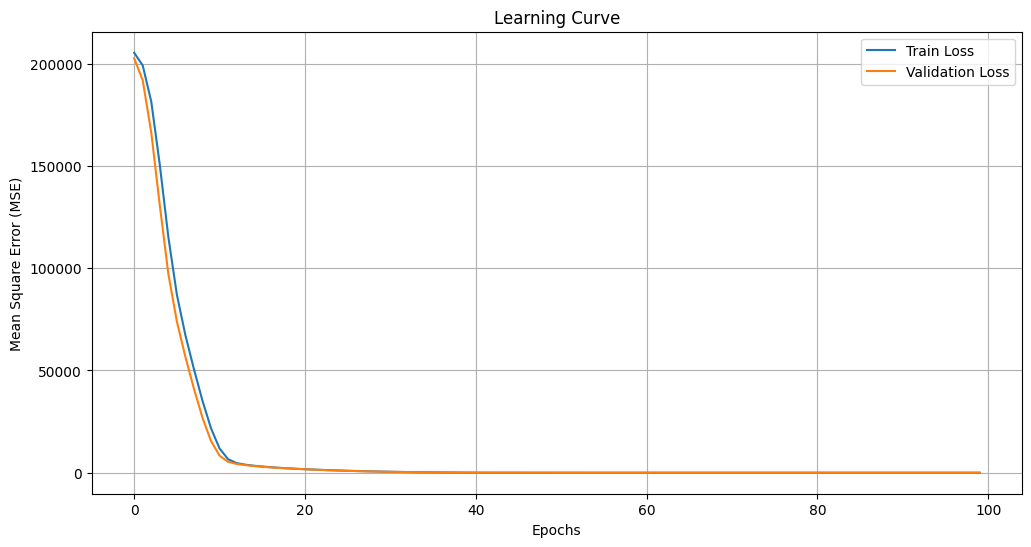

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error (MSE)')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

## Predict the results for train and test

In [31]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 2ms/step


In [34]:
ypred_train[0:5]

array([[442.8019 ],
       [433.99603],
       [431.89062],
       [427.67676],
       [431.81494]], dtype=float32)

In [36]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [35]:
ypred_test[0:5]

array([[434.70618],
       [436.50525],
       [460.6232 ],
       [476.09802],
       [436.03058]], dtype=float32)

In [37]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


## Perform detailed evaluation

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
  def evaluate_model(model, x, y):


   ypred = model.predict(x)
   mse = mean_squared_error(y, ypred)
   rmse = mse**(1/2)
   mae = mean_absolute_error(y, ypred)
   r2 = r2_score(y, ypred)
   print(f'Mean Squared Error : {mse:.2f}')
   print(f'Root Mean Squared Error : {rmse:.2f}')
   print(f'Mean Absolute Error : {mae:.2f}')
   print(f'R2 Score : {r2:.4f}')


In [43]:
evaluate_model(model, xtrain, ytrain)

240/240 [==============================] - 1s 2ms/step
Mean Squared Error : 19.67
Root Mean Squared Error : 4.43
Mean Absolute Error : 3.48
R2 Score : 0.9328


In [44]:
evaluate_model(model, xtest, ytest)

60/60 [==============================] - 0s 3ms/step
Mean Squared Error : 18.47
Root Mean Squared Error : 4.30
Mean Absolute Error : 3.36
R2 Score : 0.9354


## R2 score in test is 0.9336 > 0.8 hence above model is very good

## Saving above model (.keras)

In [45]:
model.save('PowerOutput.keras')

## Load the above model

In [46]:
from keras.models import load_model

In [47]:
m = load_model('/content/PowerOutput.keras')

In [48]:
m.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
m.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 8) dtype=float32, numpy=
 array([[ 0.17782877, -0.47426262,  0.12351504,  0.36176577,  0.15079297,
         -1.0239797 , -0.07222408,  0.5165612 ],
        [ 0.25322136,  0.40615994, -0.39559764, -0.5111283 ,  0.36253154,
         -1.4734262 , -0.16950119,  0.8950817 ],
        [ 0.5429256 , -0.4767675 , -0.6629569 ,  0.4570549 , -0.3372343 ,
          0.49245298,  0.4245543 ,  0.7902188 ],
        [ 0.4061079 , -0.4446185 ,  0.35340914,  0.13822605,  1.2964904 ,
         -0.04623127, -1.1707933 ,  0.14825879]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(8,) dtype=float32, numpy=
 array([0.09973884, 3.4203475 , 3.2517297 , 0.71376   , 3.8549893 ,
        4.16216   , 3.2767425 , 3.189174  ], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(8, 4) dtype=float32, numpy=
 array([[-0.5586498 , -0.2719799 , -0.6076945 , -0.5389681 ],
        [ 2.0077872 ,  1.9918778 ,  2.6770754 , -0.22844689],
        [ 2.570664  ,  2.8152897 ,  2.76